In [24]:
import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
import seaborn as srn
from matplotlib import pyplot
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn import datasets
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()


In [7]:
y = pd.DataFrame(iris['target'], columns=['flower'])
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
y.head()

,flower
0,0
1,0
2,0
3,0
4,0


In [8]:
x.columns

Index([u'sepal length (cm)', u'sepal width (cm)', u'petal length (cm)',
       u'petal width (cm)'],
      dtype='object')

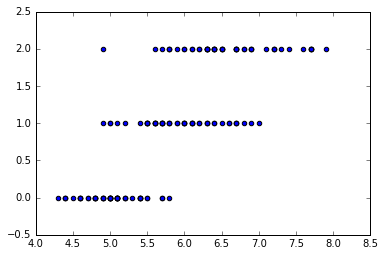

In [12]:
plt.scatter(x['sepal length (cm)'], y)

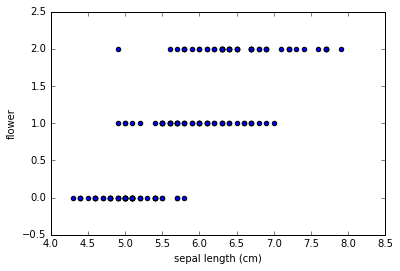

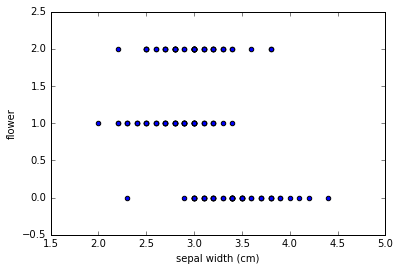

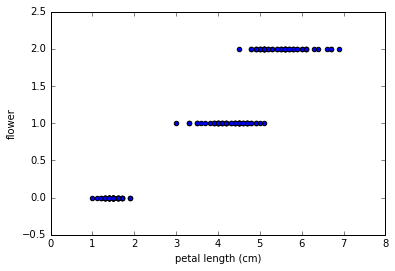

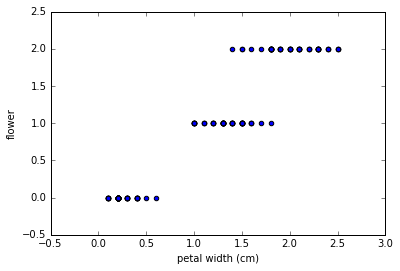

In [16]:
for i in x.columns:
    plt.scatter(x[i], y)
    plt.ylabel("flower")
    plt.xlabel(i)
    plt.show()

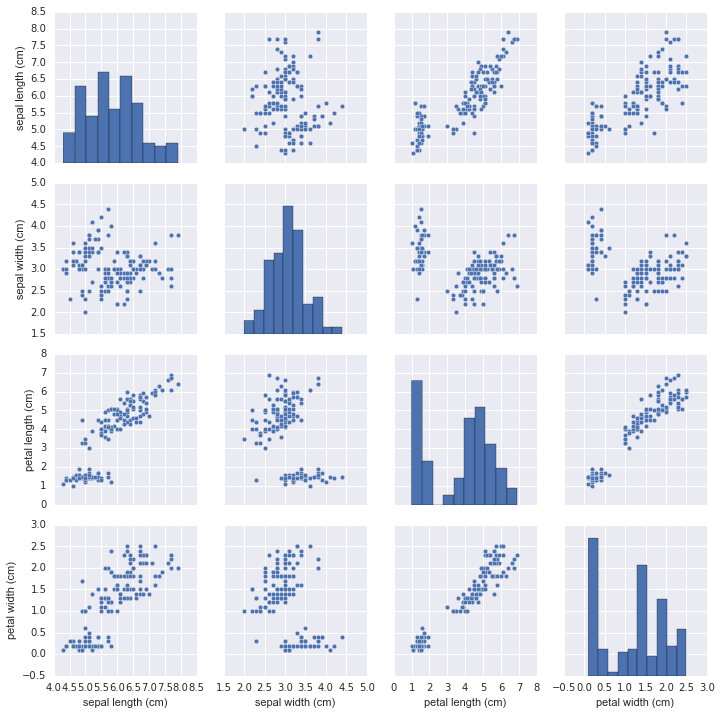

In [18]:
srn.pairplot(x)

In [20]:
x_standard = StandardScaler().fit_transform(x)
y_standard = StandardScaler().fit_transform(y)

In [25]:
list_of_scores = []

for x in range(2, 11): 
    kmeans = KMeans(n_clusters=x)
    kmeans.fit(x_standard)
    predictions = kmeans.predict(x_standard)
    sil = silhouette_score(x_standard, predictions)
    list_of_scores.append((x, sil))

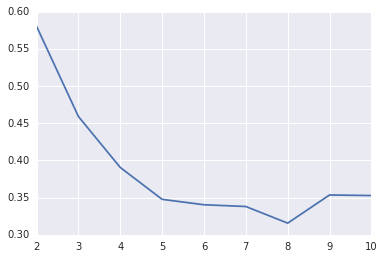

In [26]:
plt.plot([x[0] for x in list_of_scores],
         [x[1] for x in list_of_scores])

In [27]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(x_standard)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=4, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [30]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [31]:
labels

array([0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 3,
       0, 3, 0, 3, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [32]:
centroids

array([[-0.72358967,  1.47706293, -1.29752956, -1.20678702],
       [ 1.13140499,  0.08716178,  0.98548265,  0.99875633],
       [-0.06881714, -0.89036741,  0.34501443,  0.28492552],
       [-1.32981738,  0.15465432, -1.31283955, -1.30749869]])

In [35]:
predictions = kmeans.predict(x_standard)

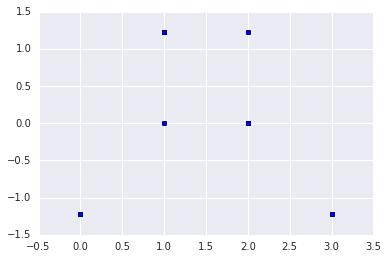

In [39]:
plt.scatter(predictions, y_standard)

In [38]:
x_standard.shape

(150, 4)